# Defining Attributes or variables in the data
1. ALF = Axial Load Factor 
2. AS = Aspect Ratio 
3. Rho = Reinforcement Ratio 
4. CT = Confinement Type 
5. C = Configuration Type 
6. CRPa = Clear Cover Ratio Parallel to Load 
7. CRPe = Clear Cover Ratio Perpendicular to Load 
8. TRI = Tranvserse Reinforcement Index 
9. DLI = Ductility Intermediate Bar 
10. DLC = Ductility Corner Bar
11. LRII = Longitudinal Intermediate Bar
12. LRIC = Longitudinal Corrner Bar


In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
recColumn = pd.read_csv("recColumnData.csv")
recColumn.head()

,ALF,AS,LRII,LRIC,Rho,CT,C,CRPa,CRPe,DLI,DLC,TRI,Failure
0,0.259740,2.181818,0.097150,0.1943,0.0179,7,DE,0.072727,0.072727,1.694933,1.694933,0.367347,Flexure
1,0.213998,2.181818,0.054207,0.1084,0.0179,7,DE,0.069091,0.069091,1.694933,1.694933,0.334973,Flexure
2,0.420020,2.181818,0.104867,0.2097,0.0179,4,DE,0.072727,0.072727,1.694933,1.694933,0.422964,Flexure
3,0.599965,2.181818,0.095496,0.1910,0.0179,4,DE,0.069091,0.069091,1.694933,1.694933,0.664159,Flexure
4,0.380032,4.000000,0.090983,0.1820,0.0151,4,DE,0.061250,0.061250,1.569087,1.569087,0.613656,Flexure


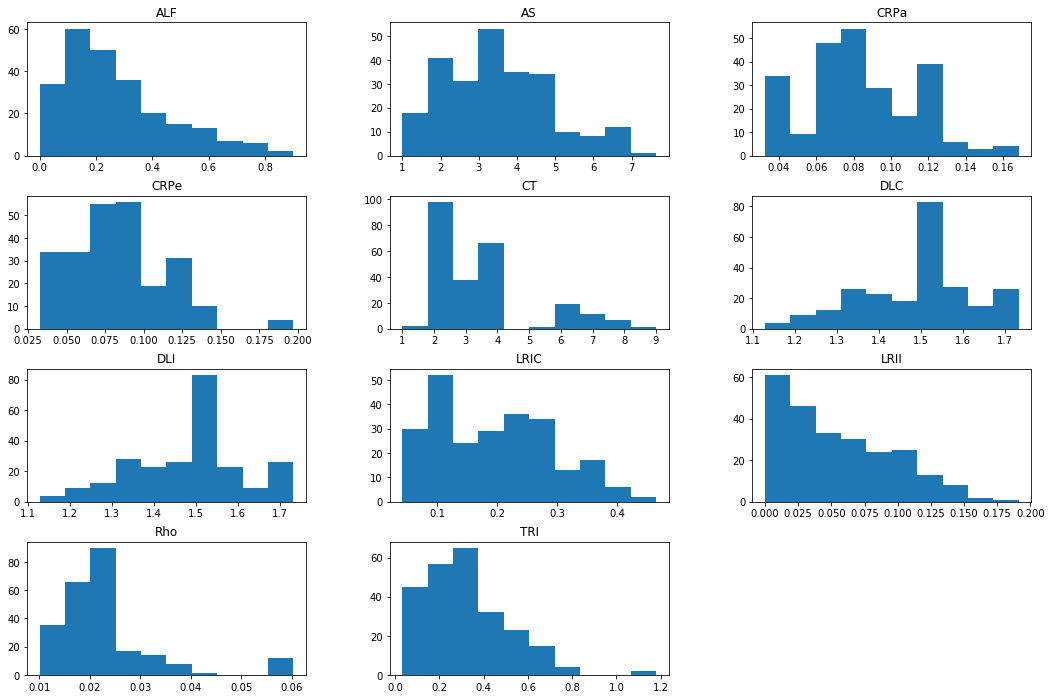

In [78]:
import matplotlib.pyplot as plt 
Whole_fig = recColumn.hist(bins = 10, figsize = (18,12), grid = False)
plt.savefig('Whole_fig.png')

In [79]:
recColumn.isna().sum()

ALF        0
AS         0
LRII       0
LRIC       0
Rho        0
CT         0
C          0
CRPa       0
CRPe       0
DLI        0
DLC        0
TRI        0
Failure    0
dtype: int64

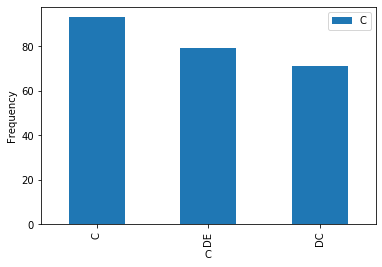

In [80]:
C_fig= pd.DataFrame(recColumn.C.value_counts())
C_fig
C_fig.plot(kind = 'bar', grid = False)
plt.xlabel('C')
plt.ylabel('Frequency')
plt.savefig('C.png')

In [81]:
recColumn.shape

(243, 13)

In [82]:
fa = pd.DataFrame(recColumn.Failure.value_counts())
fa

,Failure
Flexure,191
Flexure-shear,34
Shear,18


In [83]:
fa1 = pd.DataFrame(recColumn.Failure.value_counts(normalize = True))
fa1

,Failure
Flexure,0.786008
Flexure-shear,0.139918
Shear,0.074074


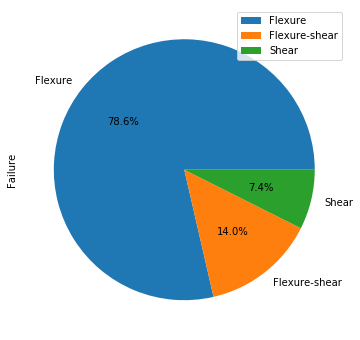

In [84]:
fa1.plot(kind = 'pie', figsize = (6,6), subplots = True, autopct = '%1.1f%%')
plt.savefig('fa1.png')

In [85]:
!pip install imbalanced-learn 

In [86]:
X = recColumn.drop('Failure', axis =1)
y = recColumn['Failure']
print(y.head())
print(X.head())


0    Flexure
1    Flexure
2    Flexure
3    Flexure
4    Flexure
Name: Failure, dtype: object
        ALF        AS      LRII    LRIC     Rho  CT   C      CRPa      CRPe  \
0  0.259740  2.181818  0.097150  0.1943  0.0179   7  DE  0.072727  0.072727   
1  0.213998  2.181818  0.054207  0.1084  0.0179   7  DE  0.069091  0.069091   
2  0.420020  2.181818  0.104867  0.2097  0.0179   4  DE  0.072727  0.072727   
3  0.599965  2.181818  0.095496  0.1910  0.0179   4  DE  0.069091  0.069091   
4  0.380032  4.000000  0.090983  0.1820  0.0151   4  DE  0.061250  0.061250   

        DLI       DLC       TRI  
0  1.694933  1.694933  0.367347  
1  1.694933  1.694933  0.334973  
2  1.694933  1.694933  0.422964  
3  1.694933  1.694933  0.664159  
4  1.569087  1.569087  0.613656  


In [87]:
from sklearn.preprocessing import LabelEncoder 
Failure_n = LabelEncoder()
y= Failure_n.fit_transform(y)
y  
# 0 represents the flexure failure
#1 represents Shear failure 
#2 represents flexure-shear failure 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [88]:
#y = pd.get_dummies(y)
#y.head()

In [89]:
X = pd.get_dummies(X, drop_first =True)
X.head()

,ALF,AS,LRII,LRIC,Rho,CT,CRPa,CRPe,DLI,DLC,TRI,C_DC,C_DE
0,0.259740,2.181818,0.097150,0.1943,0.0179,7,0.072727,0.072727,1.694933,1.694933,0.367347,0,1
1,0.213998,2.181818,0.054207,0.1084,0.0179,7,0.069091,0.069091,1.694933,1.694933,0.334973,0,1
2,0.420020,2.181818,0.104867,0.2097,0.0179,4,0.072727,0.072727,1.694933,1.694933,0.422964,0,1
3,0.599965,2.181818,0.095496,0.1910,0.0179,4,0.069091,0.069091,1.694933,1.694933,0.664159,0,1
4,0.380032,4.000000,0.090983,0.1820,0.0151,4,0.061250,0.061250,1.569087,1.569087,0.613656,0,1


In [90]:
from imblearn.over_sampling import SMOTE    #creating more examples due to the imbalance in the target attribute 
sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(X,y)
print(X.shape)
print(X_sm.shape)


(243, 13)
(573, 13)


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size = 0.2, random_state = 42)

In [92]:
X_test.head()

,ALF,AS,LRII,LRIC,Rho,CT,CRPa,CRPe,DLI,DLC,TRI,C_DC,C_DE
513,0.230084,1.480762,0.098460,0.218147,0.028589,2,0.066196,0.066196,1.216033,1.216033,0.118785,1,0
70,0.349910,2.000000,0.000000,0.061800,0.018100,2,0.122000,0.122000,1.510324,1.510324,0.162986,1,0
131,0.097542,3.827869,0.142569,0.224000,0.022200,6,0.045902,0.045902,1.631696,1.631696,0.170367,0,0
405,0.020390,2.793297,0.129155,0.243695,0.021421,1,0.083164,0.083164,1.569035,1.569035,0.063013,0,0
544,0.162257,1.559928,0.114024,0.266100,0.030100,6,0.085710,0.085710,1.689342,1.689342,0.101293,1,0


In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(458, 13)
(115, 13)
(458,)
(115,)


# Decision Tree Evaluation after Fine Tuning 

In [94]:
from sklearn import tree
rec = tree.DecisionTreeClassifier(max_depth = 5)
recColumn_model = rec.fit(X_train, y_train)

[Text(426.54807692307696, 996.6, 'X[1] <= 3.361\ngini = 0.667\nsamples = 458\nvalue = [152, 152, 154]'),
 Text(394.3557692307692, 815.4000000000001, 'X[1] <= 1.656\ngini = 0.632\nsamples = 374\nvalue = [68, 152, 154]'),
 Text(209.25, 634.2, 'X[7] <= 0.089\ngini = 0.324\nsamples = 133\nvalue = [0, 27, 106]'),
 Text(128.76923076923077, 453.0, 'X[2] <= 0.005\ngini = 0.132\nsamples = 113\nvalue = [0, 8, 105]'),
 Text(64.38461538461539, 271.79999999999995, 'X[10] <= 0.523\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(32.19230769230769, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(96.57692307692308, 90.59999999999991, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(193.15384615384616, 271.79999999999995, 'X[4] <= 0.017\ngini = 0.019\nsamples = 105\nvalue = [0, 1, 104]'),
 Text(160.96153846153845, 90.59999999999991, 'gini = 0.219\nsamples = 8\nvalue = [0, 1, 7]'),
 Text(225.34615384615387, 90.59999999999991, 'gini = 0.0\nsamples = 97\nvalue = [0, 0, 97

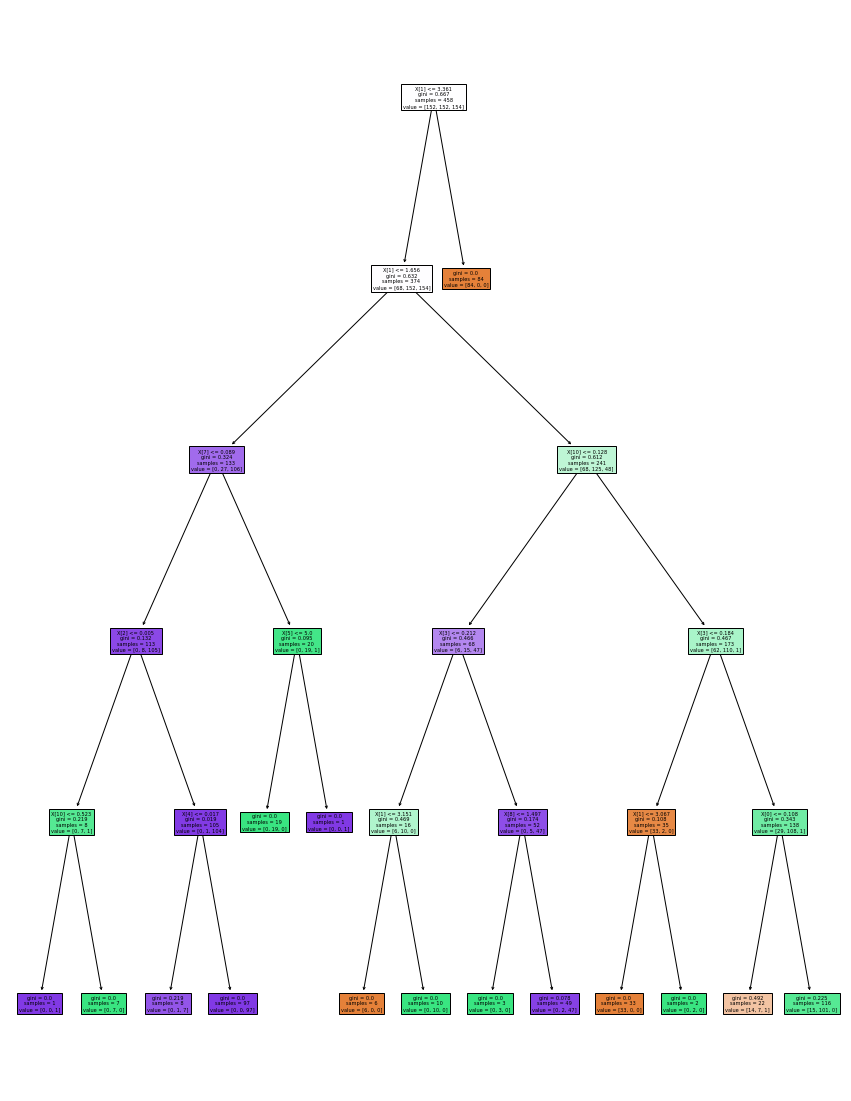

In [95]:
plt.figure(figsize = (15,20))
tree.plot_tree(recColumn_model,filled = True)

In [96]:
rec.predict(X_test[:10])

array([2, 0, 0, 2, 2, 1, 2, 0, 1, 1])

In [97]:
y_test[:10]

array([2, 0, 0, 2, 2, 1, 2, 0, 1, 1])

In [98]:
rec.predict([[2.5,2,3,4,5,3,4,5,2,1,3,5,6]])
# 0 represents the flexure failure
#1 represents Shear failure 
#2 represents flexure-shear failure 

array([1])

In [99]:
rec.score(X_test, y_test)

0.9478260869565217

# Visualising the Predicted and Test Failure Mode for max_depth = 5 and max_depth = 2

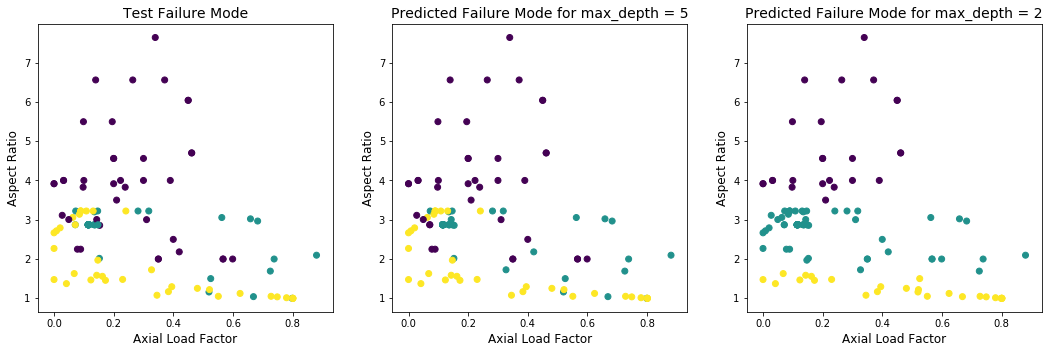

In [100]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
rec_2 = DecisionTreeClassifier(max_depth = 2)
rec_2_model = rec_2.fit(X_train, y_train)

#y_predicted for max_depth = 5
y_predicted_5 = rec.predict(X_test).reshape(1, len(X_test))

#y_predicted for max_depth = 2
y_predicted_2 = rec_2_model.predict(X_test).reshape(1, len(X_test))
Failure_mode = y_test.reshape(1, len(y_test))


Axial_load_factor = np.array(X_test[['ALF']]).reshape(1,len(X_test[['ALF']]))
Aspect_Ratio = np.array(X_test[['AS']]).reshape(1,len(X_test[['AS']]))



plt.figure(figsize= (18,18))
ax1 = plt.subplot2grid((3,3), (0,0))
ax2 = plt.subplot2grid((3,3), (0,1))
ax3 = plt.subplot2grid((3,3), (0,2))


#plot for the test failure mode 
ax1.scatter(Axial_load_factor, Aspect_Ratio, c = Failure_mode)
ax1.set_xlabel('Axial Load Factor',fontsize = 12)
ax1.set_ylabel('Aspect Ratio',fontsize = 12)
ax1.set_title('Test Failure Mode', fontsize = 14)

#plot for the predicted failure mode for the max_depth = 5
ax2.scatter(Axial_load_factor, Aspect_Ratio, c = y_predicted_5)
ax2.set_xlabel('Axial Load Factor', fontsize = 12)
ax2.set_ylabel('Aspect Ratio', fontsize = 12)
ax2.set_title('Predicted Failure Mode for max_depth = 5', fontsize = 14)

#plot for the predicted failure mode for the max_depth = 2
ax3.scatter(Axial_load_factor, Aspect_Ratio, c = y_predicted_2)
ax3.set_xlabel('Axial Load Factor', fontsize = 12)
ax3.set_ylabel('Aspect Ratio', fontsize = 12)
ax3.set_title('Predicted Failure Mode for max_depth = 2', fontsize = 14)
plt.show()

In [101]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 


In [102]:
from sklearn.model_selection import cross_val_score
model_val = [DecisionTreeClassifier(max_depth = 5), SVC(gamma = 'auto', C = 20, kernel = 'linear'),
             RandomForestClassifier(n_estimators =20 )]
cross_score = []
for m in model_val:
    cross_score_validation = cross_val_score(m, X_train, y_train,cv =5)
    cross_score.append(cross_score_validation.mean())
cross_score


[0.8732919254658384, 0.9103440038222648, 0.9715241280458672]

# Fine Tuning of Classifiers

In [103]:
model_params = {
    'svm': {'model':
        SVC(gamma = 'auto'),
        'params':{
            'kernel': ['rbf','linear'], 
            'C': [1,10,20]
        }
            
    },
    'Tree': {'model':
            DecisionTreeClassifier(),
    'params':{
        'max_depth':[2,5]
    }
},        
    'Forest': {'model':
              RandomForestClassifier(),
               'params': {
                   'n_estimators': [10,20]
               }
              
              
            }
    
}

In [104]:
scores = []
import pandas as pd
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    column = GridSearchCV(mp['model'], mp['params'], cv =5,return_train_score = False)
    column.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': column.best_score_,
        'best_params': column.best_params_
        
    })
df = pd.DataFrame(scores, columns = ['model', 'best_score','best_params' ])  
df

,model,best_score,best_params
0,svm,0.910344,"{'C': 20, 'kernel': 'linear'}"
1,Tree,0.873292,{'max_depth': 5}
2,Forest,0.978118,{'n_estimators': 10}


# Performance Metrics of Classifiers 

In [105]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [106]:
model = [DecisionTreeClassifier(max_depth = 5),  RandomForestClassifier(n_estimators = 10), 
         SVC(gamma = 'auto', C = 20, kernel = 'rbf')]
accuracy = []
confusion = []
report = []
for m in model:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    confusion.append(confusion_matrix(y_test, y_pred))
    report.append(classification_report(y_test, y_pred))
print('Accuracy for Decision Tree: \n', accuracy[0])
print('Accuracy for Random Forest: \n', accuracy[1])
print('Accuracy for Support Vector Machine: \n', accuracy[2])

Accuracy for Decision Tree: 
 0.9478260869565217
Accuracy for Random Forest: 
 0.9826086956521739
Accuracy for Support Vector Machine: 
 0.9217391304347826


In [107]:
!pip install seaborn 

In [108]:
print('Confusion Matrix for Decision Tree: \n', confusion[0])
print('Confusion Matrix for Random Forest: \n', confusion[1])
print('Confusion Matrix for Support Vector Machine: \n', confusion[2])

Confusion Matrix for Decision Tree: 
 [[36  3  0]
 [ 1 38  0]
 [ 1  1 35]]
Confusion Matrix for Random Forest: 
 [[39  0  0]
 [ 0 39  0]
 [ 0  2 35]]
Confusion Matrix for Support Vector Machine: 
 [[36  3  0]
 [ 0 35  4]
 [ 1  1 35]]


In [109]:
print('Classification Report for Decision Tree: \n', report[0])
print('Classification Report for Random Forest: \n', report[1])
print('Classification Report for Support Vector Machine: \n', report[2])

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.90      0.97      0.94        39
           2       1.00      0.95      0.97        37

    accuracy                           0.95       115
   macro avg       0.95      0.95      0.95       115
weighted avg       0.95      0.95      0.95       115

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      1.00      0.97        39
           2       1.00      0.95      0.97        37

    accuracy                           0.98       115
   macro avg       0.98      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115

Classification Report for Support Vector Machine: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95  

In [110]:
a = confusion[0]
b = confusion[1]
c = confusion[2]

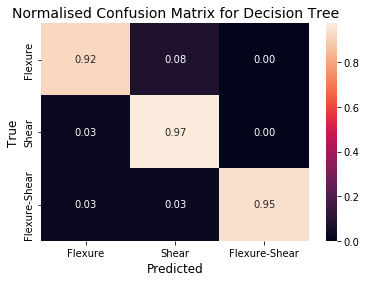

In [111]:
a = a.astype('float')/a.sum(axis  =1)[:, np.newaxis]

import seaborn as sn 
labels = ['Flexure', 'Shear', 'Flexure-Shear']
sn.heatmap(a, annot = True, fmt = '.2f',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('True', fontsize = 12)
plt.title('Normalised Confusion Matrix for Decision Tree', fontsize = 14)
plt.savefig('Normalised_tree.png')


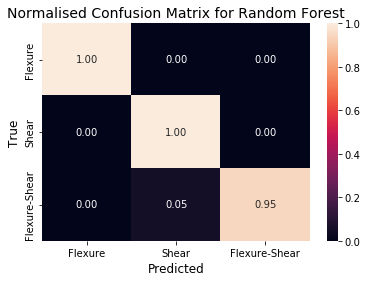

In [112]:
b = b.astype('float')/b.sum(axis  =1)[:, np.newaxis]
labels = ['Flexure', 'Shear', 'Flexure-Shear']
sn.heatmap(b, annot = True, fmt = '.2f',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('True', fontsize = 12)
plt.title('Normalised Confusion Matrix for Random Forest', fontsize = 14)
plt.savefig('Normalised_forest.png')

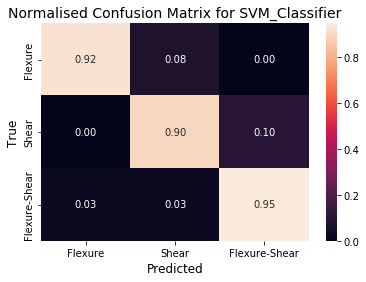

In [113]:
c = c.astype('float')/c.sum(axis  =1)[:, np.newaxis]
labels = ['Flexure', 'Shear', 'Flexure-Shear']
sn.heatmap(c, annot = True, fmt = '.2f',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('True', fontsize = 12)
plt.title('Normalised Confusion Matrix for SVM_Classifier', fontsize = 14)
plt.savefig('Normalised_svm.png')

# ARTIFICIAL NEURAL NETWORK 

In [114]:
import tensorflow as tf 
from tensorflow import keras 

In [115]:
X_train_ann = np.array(X_train)
X_train_ann

array([[0.11116601, 3.5       , 0.13929891, ..., 0.43567977, 0.        ,
        0.        ],
       [0.61627907, 1.5       , 0.09922003, ..., 0.53376364, 1.        ,
        0.        ],
       [0.42785114, 4.7       , 0.06536309, ..., 0.53629952, 0.        ,
        0.        ],
       ...,
       [0.61015575, 3.03219886, 0.06311725, ..., 0.41227508, 1.        ,
        0.        ],
       [0.26811499, 1.12221875, 0.09502474, ..., 0.21586004, 1.        ,
        0.        ],
       [0.        , 2.85714286, 0.0790716 , ..., 0.12906447, 0.        ,
        0.        ]])

In [116]:
ann = keras.Sequential([
    keras.layers.Dense(13, activation = 'relu'),
    keras.layers.Dense(130, activation = 'relu'),
    keras.layers.Dense(130, activation = 'relu'),
    keras.layers.Dense(130, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

ann.fit(X_train_ann, y_train, epochs = 50)

Epoch 1/50
458/458 [==============================] - 1s 1ms/sample - loss: 1.0037 - acc: 0.4847
Epoch 2/50
458/458 [==============================] - 0s 527us/sample - loss: 0.8273 - acc: 0.6900
Epoch 3/50
458/458 [==============================] - 0s 340us/sample - loss: 0.6866 - acc: 0.7162
Epoch 4/50
458/458 [==============================] - 0s 464us/sample - loss: 0.6184 - acc: 0.7445
Epoch 5/50
458/458 [==============================] - 0s 348us/sample - loss: 0.5796 - acc: 0.7358
Epoch 6/50
458/458 [==============================] - 0s 263us/sample - loss: 0.5190 - acc: 0.7773
Epoch 7/50
458/458 [==============================] - 0s 346us/sample - loss: 0.4972 - acc: 0.8079
Epoch 8/50
458/458 [==============================] - 0s 407us/sample - loss: 0.4912 - acc: 0.7860
Epoch 9/50
458/458 [==============================] - 0s 316us/sample - loss: 0.4384 - acc: 0.8144
Epoch 10/50
458/458 [==============================] - 0s 346us/sample - loss: 0.3874 - acc: 0.8472
Epoch 11/50

In [117]:
ann.evaluate(X_test, y_test)

115/115 [==============================] - 0s 1ms/sample - loss: 0.2124 - acc: 0.9565


[0.21242916765420333, 0.95652175]

In [118]:
y_pred = ann.predict(X_test)

In [119]:
y_pred[:5]

array([[4.6712472e-03, 9.4088160e-02, 9.0124065e-01],
       [5.7847597e-02, 9.1396773e-01, 2.8184609e-02],
       [1.0000000e+00, 2.0511557e-14, 4.2094475e-09],
       [2.9386434e-04, 9.7444885e-05, 9.9960870e-01],
       [3.7352922e-05, 2.3584867e-04, 9.9972683e-01]], dtype=float32)

In [120]:
y_predicted = [np.argmax(i) for i in y_pred]

In [121]:
y_predicted[:5]

[2, 1, 0, 2, 2]

In [122]:
from sklearn.metrics import classification_report, confusion_matrix

In [123]:
print('Classification report for ANN\n', classification_report(y_test, y_predicted))
cm_ann = confusion_matrix(y_test, y_predicted)

Classification report for ANN
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.91      1.00      0.95        39
           2       1.00      0.92      0.96        37

    accuracy                           0.96       115
   macro avg       0.96      0.96      0.96       115
weighted avg       0.96      0.96      0.96       115



In [124]:
cm_ann

array([[37,  2,  0],
       [ 0, 39,  0],
       [ 1,  2, 34]], dtype=int64)

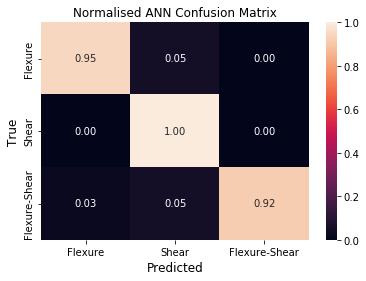

In [125]:
import seaborn as sn 
cm_ann = cm_ann.astype('float')/cm_ann.sum(axis = 1)
labels = ['Flexure', 'Shear', 'Flexure-Shear']
sn.heatmap(cm_ann, annot = True, fmt = '.2f',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('True', fontsize = 12)
plt.title('Normalised ANN Confusion Matrix')
plt.savefig('Normailsed_ANN.png')